<a href="https://colab.research.google.com/github/prapti814/ML/blob/main/car_sale_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yashpaloswal/ann-car-sales-price-prediction")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'ann-car-sales-price-prediction' dataset.
Path to dataset files: /kaggle/input/ann-car-sales-price-prediction


In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
import os

# List files in the downloaded directory to find the CSV file
files_in_directory = os.listdir(path)
csv_file = None
for file in files_in_directory:
    if file.endswith(".csv"):
        csv_file = file
        break

if csv_file:
    csv_file_path = os.path.join(path, csv_file)
    try:
        data = pd.read_csv(csv_file_path, encoding='latin1')
        print("DataFrame loaded successfully with latin1 encoding.")
    except Exception as e:
        print(f"Error reading CSV with latin1 encoding: {e}")
        try:
            data = pd.read_csv(csv_file_path, encoding='ISO-8859-1')
            print("DataFrame loaded successfully with ISO-8859-1 encoding.")
        except Exception as e:
            print(f"Error reading CSV with ISO-8859-1 encoding: {e}")
            print("Could not read the CSV file with common encodings.")

else:
    print("No CSV file found in the downloaded directory.")

DataFrame loaded successfully with latin1 encoding.


In [39]:
data.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [40]:
data=data.drop(columns=["customer name","customer e-mail","country"])

In [41]:
data.head()


,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


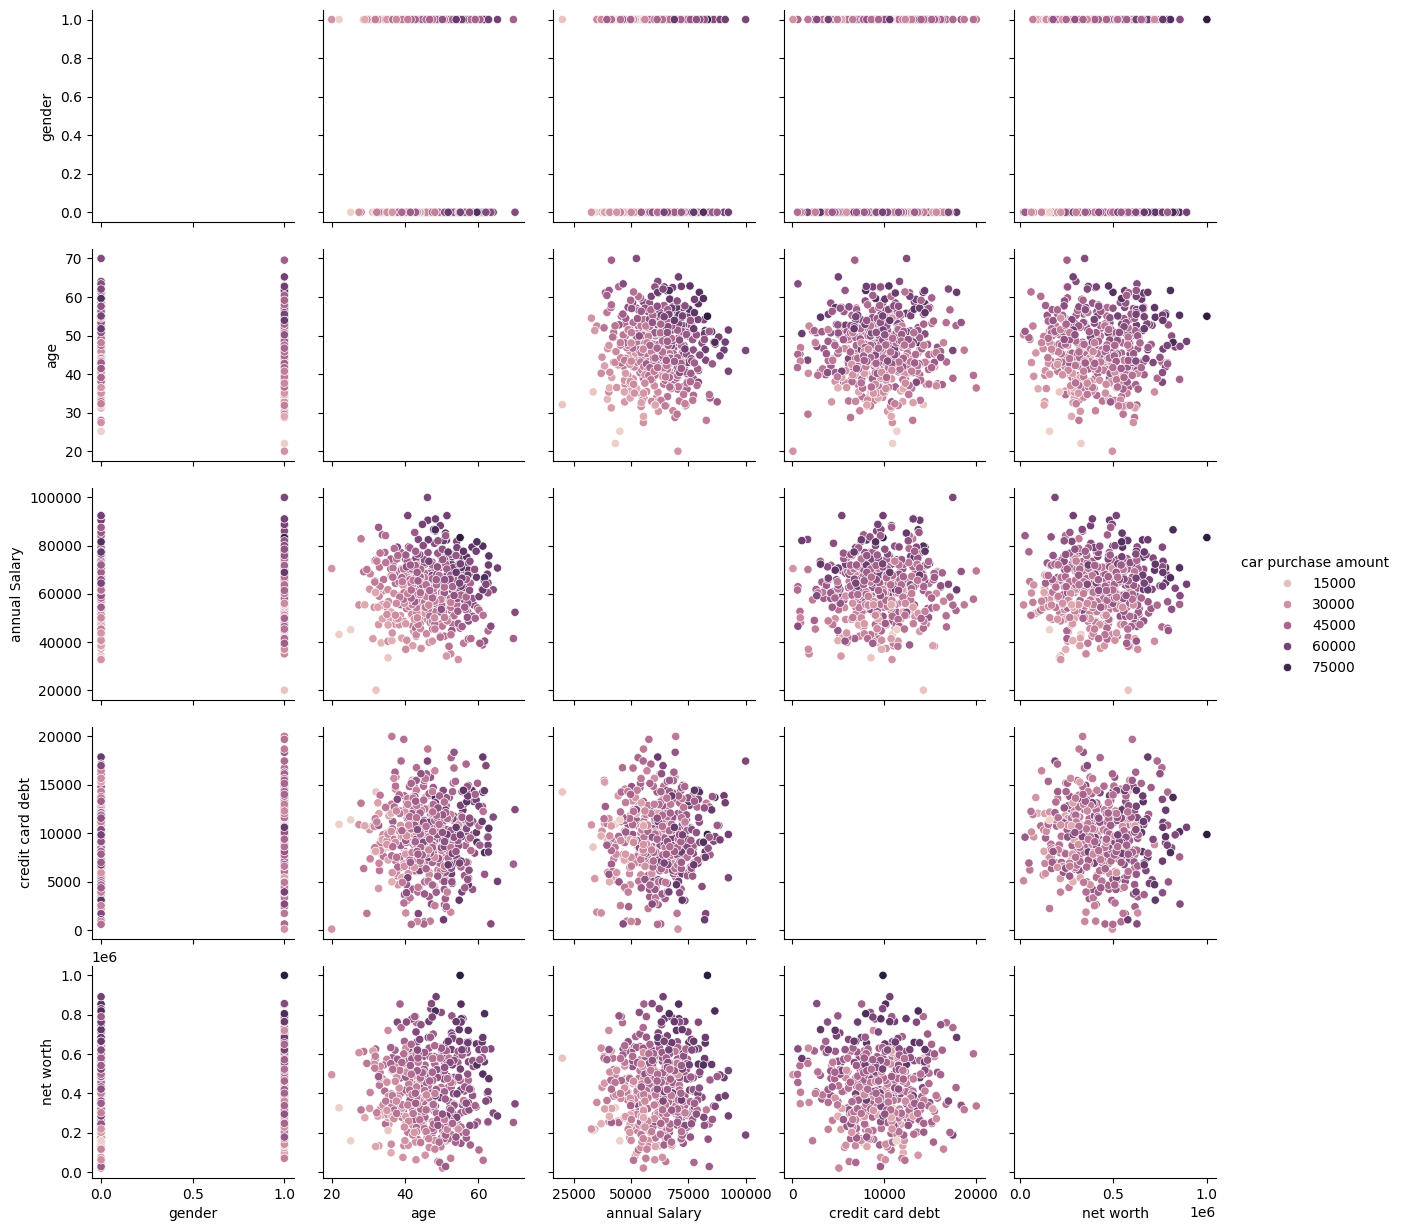

In [98]:
sns.pairplot(data=data, hue="car purchase amount")

In [43]:
data.isnull().sum()

,0
gender,0
age,0
annual Salary,0
credit card debt,0
net worth,0
car purchase amount,0


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               500 non-null    int64  
 1   age                  500 non-null    float64
 2   annual Salary        500 non-null    float64
 3   credit card debt     500 non-null    float64
 4   net worth            500 non-null    float64
 5   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [68]:
x=data.iloc[:,:-1]
y=data["car purchase amount"]


In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x.shape

(500, 5)

In [71]:
from sklearn.preprocessing import StandardScaler

In [81]:
st = StandardScaler()
x = pd.DataFrame(st.fit_transform(x), columns=x.columns)
# No need to scale the target variable y for this regression task
# y = pd.DataFrame(st.fit_transform(y), columns=y.columns)

In [79]:
x.head()

,gender,age,annual Salary,credit card debt,net worth
0,-1.012073,-0.550749,0.058576,0.574271,-1.110469
1,-1.012073,-0.673834,0.386570,-0.009951,0.573929
2,0.988071,-0.387508,-0.712361,0.445452,1.193976
3,0.988071,1.509206,1.474794,1.382369,0.675595
4,0.988071,1.389066,-0.205111,-1.218962,0.743113


In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [101]:
model=Sequential()
model.add(Dense(128,input_dim=5,activation="relu"))
model.add(Dense(72,activation="relu"))
model.add(Dense(36,activation="relu"))
model.add(Dense(1,activation="linear"))

In [112]:
from tensorflow.keras.optimizers import Adam
opt=Adam(learning_rate=0.001)

In [113]:
model.compile(loss="mean_squared_error",optimizer=opt, metrics=["MSE"])

In [117]:
model.fit(x_train,y_train,epochs=50,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - MSE: 1807.2485 - loss: 1807.2485 - val_MSE: 1512.9712 - val_loss: 1512.9712
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - MSE: 918.1049 - loss: 918.1049 - val_MSE: 637.3219 - val_loss: 637.3219
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - MSE: 432.6865 - loss: 432.6865 - val_MSE: 561.8489 - val_loss: 561.8489
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - MSE: 223.3333 - loss: 223.3333 - val_MSE: 1133.6504 - val_loss: 1133.6504
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - MSE: 455.1120 - loss: 455.1120 - val_MSE: 1078.3065 - val_loss: 1078.3065
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - MSE: 570.2815 - loss: 570.2815 - val_MSE: 1572.8408 - val_loss: 1572.8408
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - MSE: 776.1922 - loss: 776.1922 - val_MSE: 1001.3495 - val_loss: 1001.3495
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - MSE: 334.4439 - loss: 334.4439 - val_MSE: 682.3466 - val_loss: 682.

In [120]:
data["predict"]=model.predict(x)



16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [121]:
data.head()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount,predict
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877,35337.484375
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566,45103.347656
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921,42903.503906
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313,67439.234375
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248,55894.937500


In [126]:
from sklearn.metrics import accuracy_score,r2_score

In [128]:
r2_score(y,data["predict"])*100

99.99969077958208